<a href="https://colab.research.google.com/github/FernandoMagana/inteligenciaartificial_Y_redesneuronales/blob/main/Proyecto_final_equipo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PIA- RED NEURONAL CONVULSIONAL 
#EQUIPO 6
#INTEGRANTES:
#JESUS FERNANDO MAGAÑA ROMERO 1815761
#LUIS DAVID MARTINEZ ESCOBEDO 1671219
#IMELDA YAMILET MIRANDA LEIJA 1934665

PROYECTO INTEGRADOR DE APRENDIZAJE.

-Creacion de una red neuronal convolucional

En este proyecto se realizará una Red Neuronal Convolucional con el conjunto de datos MNIST y ponerlo a prueba con las imágenes realizadas.

In [ ]:
#TensorFlow y TensorFlow Keras
#Para este proyecto se utilizarán las librerías dentro de Keras:
# importar librerías
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import numpy
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
Nmo_mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = Nmo_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro',
               'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

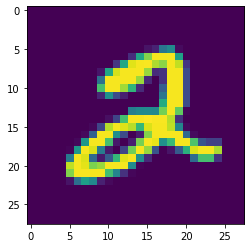

In [ ]:
plt.figure()
plt.imshow(train_images[5])
plt.colormaps()
plt.grid(False)
plt.show()

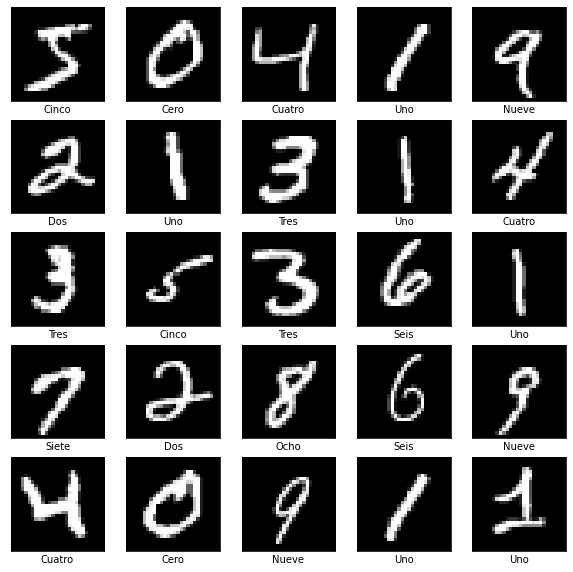

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.gray)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2563 - accuracy: 0.9266 - val_loss: 0.1398 - val_accuracy: 0.9574
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1126 - accuracy: 0.9674 - val_loss: 0.1181 - val_accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0776 - accuracy: 0.9763 - val_loss: 0.0844 - val_accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.0869 - val_accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0805 - val_accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0353 - accuracy: 0.9893 - val_loss: 0.0844 - val_accuracy: 0.9753
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0841 - val_accuracy

313/313 - 1s - loss: 0.0978 - accuracy: 0.9745 - 550ms/epoch - 2ms/step


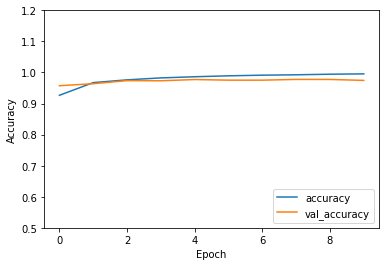

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.2])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0978 - accuracy: 0.9745 - 515ms/epoch - 2ms/step

Test accuracy: 0.9745000004768372


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

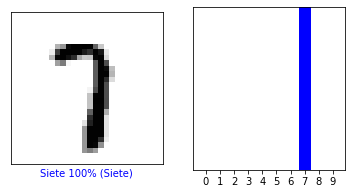

In [ ]:
i = 255
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

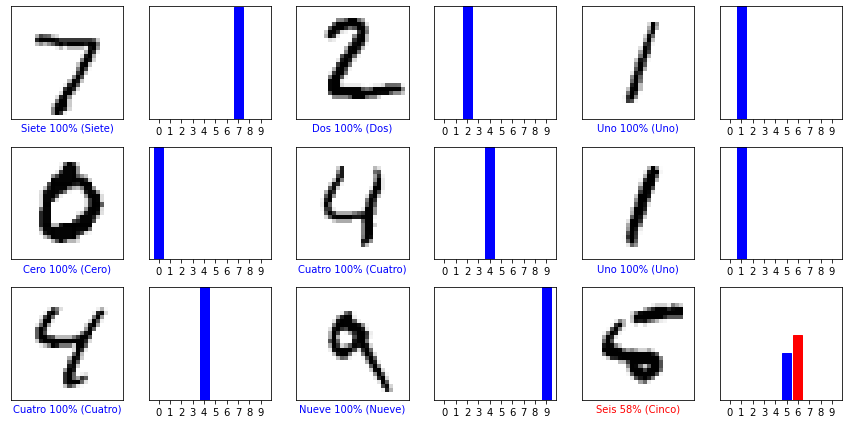

In [ ]:
# asignaré las primeras imagenes de prueba, con sus etiquetas predichas y sus etiquetas verdaderas.
# el Color azul sera para las predicciones correctas y las incorrectas en color rojo.
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**`Se realizaran algunas predicciones`:**



---




In [ ]:
#prediccion 1:

np.argmax(predictions[10])
test_labels[10]

0

In [ ]:
#prediccion 3:

np.argmax(predictions[255])
test_labels[255]

7

In [ ]:
#prediccion 3:

np.argmax(predictions[100])
test_labels[100]

6

In [ ]:
#prediccion 4:

np.argmax(predictions[205])
test_labels[205]

3

In [ ]:
#prediccion 5:

np.argmax(predictions[99])
test_labels[99]

9

In [ ]:
#prediccion 6:

np.argmax(predictions[110])
test_labels[110]

8

In [ ]:
#prediccion 7:

np.argmax(predictions[300])
test_labels[300]

4

In [ ]:
#prediccion 8:

np.argmax(predictions[47])
test_labels[47]

2

In [ ]:
#prediccion 9:

np.argmax(predictions[33])
test_labels[33]

4

In [ ]:
#prediccion 10:

np.argmax(predictions[12])
test_labels[12]

9